##load data and show some information with detalies

In [2]:
#import some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load training data
train_data = pd.read_csv('train-data.csv')

# Load testing data
test_data = pd.read_csv('test-data.csv')

In [4]:
#contact train data with test data
data = pd.concat([train_data, test_data], axis=0)

In [5]:
#show example from data
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
#show the number of columns and rows on dataset
data.shape

(7253, 14)

In [7]:
#show columns of data with detalies
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 1233
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 850.0+ KB


In [8]:
#show some information about data
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2601.948435,2013.365366,5.869906e+04,5.279722,9.479468
std,1826.365869,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,906.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,2392.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,4205.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


##Data Preprocessing and Visualization

In [9]:
#delete unusful columns from data
data.drop(data.columns[0], axis=1, inplace=True)
columns_to_drop =['Location','New_Price']
data.drop(columns_to_drop, axis=1, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Year               7253 non-null   int64  
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Mileage            7251 non-null   object 
 7   Engine             7207 non-null   object 
 8   Power              7207 non-null   object 
 9   Seats              7200 non-null   float64
 10  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 680.0+ KB


In [11]:
data.head()

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [12]:
#make the Name column with the company name only
data['Name'] = data['Name'].str.split().str[0]

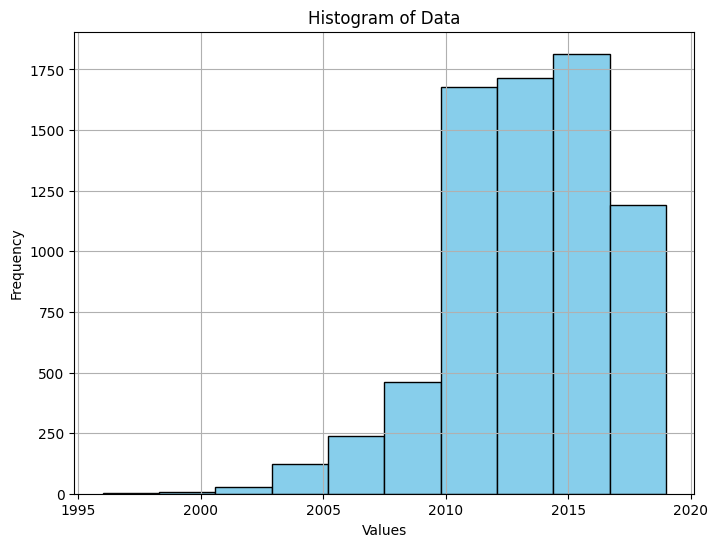

In [13]:
# Create histogram for year from data
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data['Year'], bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

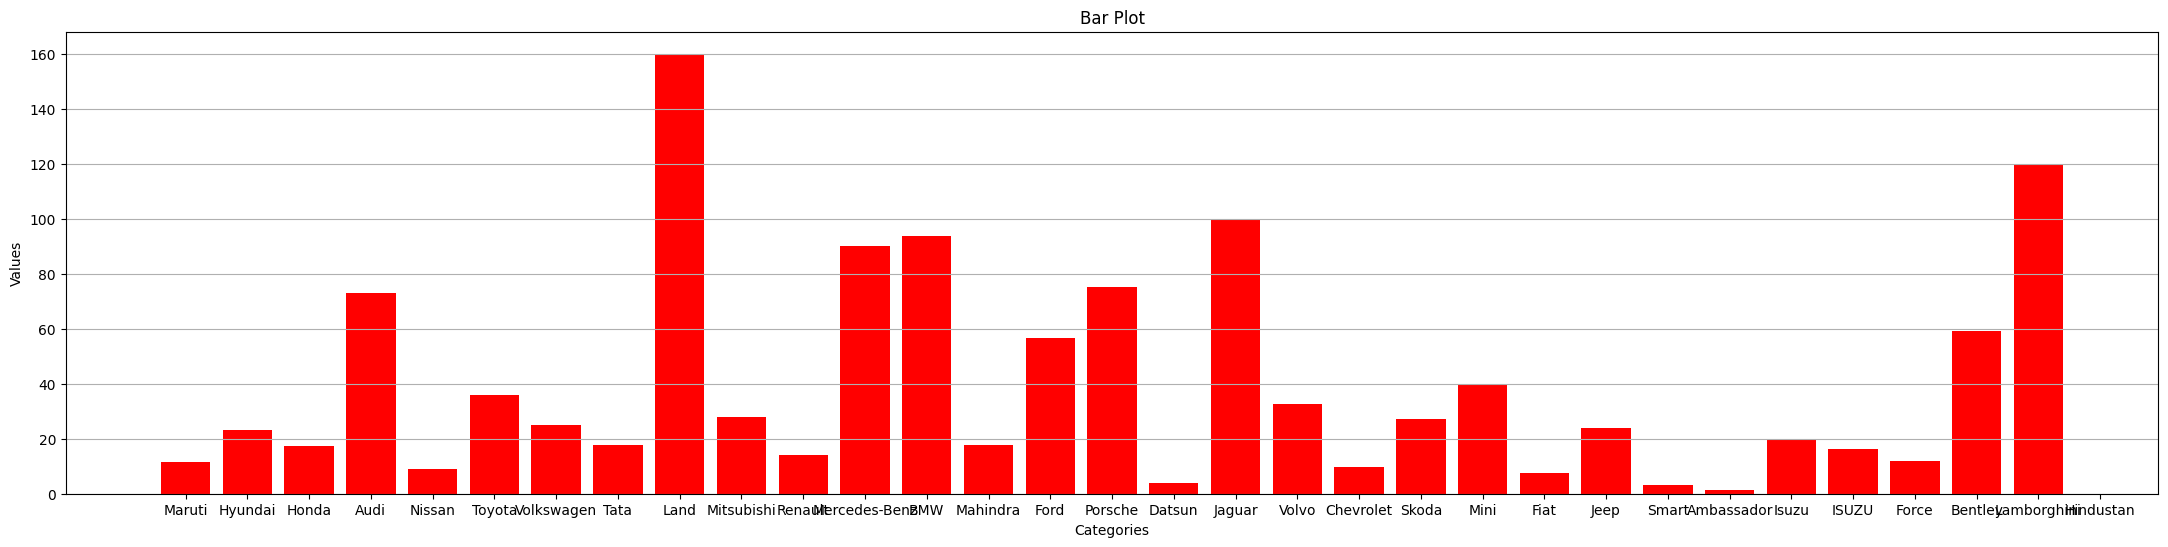

In [14]:
# Create bar plot for Name and Price
plt.figure(figsize=(27, 6))
plt.bar(data['Name'], data['Price'], color='red')
plt.title('Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.grid(axis='y')
plt.show()

In [15]:
#delete null rows in Engine column
data.dropna(subset=['Engine'], inplace=True)

In [16]:
#delete measruing unit from Engine column
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(int)


In [17]:
#delete measruing unit from Power column and turn data type to float
data['Power'] = data['Power'].str.replace('null bhp', '113')
data['Power'] = data['Power'].str.replace(' bhp', '')
data['Power'] = pd.to_numeric(data['Power'])

In [18]:
#delete measruing unit from Mileage column and turn data type to float
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '')
data['Mileage'] = data['Mileage'].str.replace(' km/kg', '')
data['Mileage'] = pd.to_numeric(data['Power'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7207 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7207 non-null   object 
 1   Year               7207 non-null   int64  
 2   Kilometers_Driven  7207 non-null   int64  
 3   Fuel_Type          7207 non-null   object 
 4   Transmission       7207 non-null   object 
 5   Owner_Type         7207 non-null   object 
 6   Mileage            7207 non-null   float64
 7   Engine             7207 non-null   int64  
 8   Power              7207 non-null   float64
 9   Seats              7200 non-null   float64
 10  Price              5983 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 675.7+ KB


In [20]:
#show values of Seats column
data['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [21]:
#show most repeated value
most_repeated_value = data['Seats'].mode().iloc[0]

print("Most Repeated Value:", most_repeated_value)

Most Repeated Value: 5.0


In [22]:
#fill null values in Seats column with most repeated value
data['Seats'].fillna(5.0, inplace=True)

In [23]:
#fill null values in Price column with column mean
data['Price'] = data['Price'].fillna(data['Price'].mean())

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7207 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7207 non-null   object 
 1   Year               7207 non-null   int64  
 2   Kilometers_Driven  7207 non-null   int64  
 3   Fuel_Type          7207 non-null   object 
 4   Transmission       7207 non-null   object 
 5   Owner_Type         7207 non-null   object 
 6   Mileage            7207 non-null   float64
 7   Engine             7207 non-null   int64  
 8   Power              7207 non-null   float64
 9   Seats              7207 non-null   float64
 10  Price              7207 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 675.7+ KB


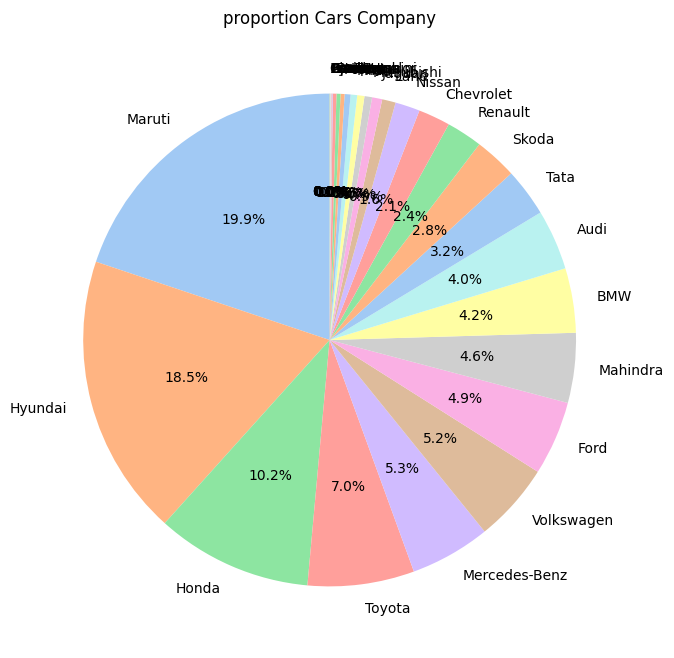

In [25]:
# Visualization of the proportion of car company in dataset using a pie chart
import seaborn as sns
department_counts = data['Name'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('proportion Cars Company')
plt.show()

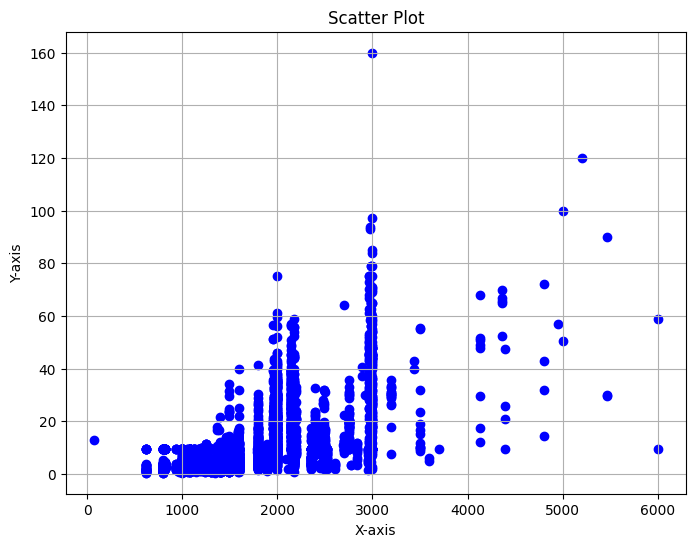

In [26]:
# Create scatter plot for Engine and Price columns
plt.figure(figsize=(8, 6))
plt.scatter(data['Engine'], data['Price'], color='blue', marker='o')
plt.title('Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

In [27]:
#do Label encoder for un numeric columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Fuel_Type'] = label_encoder.fit_transform(data['Fuel_Type'])
data['Transmission'] = label_encoder.fit_transform(data['Transmission'])
data['Owner_Type'] = label_encoder.fit_transform(data['Owner_Type'])
data['Name'] = label_encoder.fit_transform(data['Name'])


##Feature Engineer and Scalling and Split Dataset

In [28]:
#create column with name age for car age
this_Year=2024
data['age']=this_Year-data['Year']
data = data.drop(['Year'], axis="columns")

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7207 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7207 non-null   int64  
 1   Kilometers_Driven  7207 non-null   int64  
 2   Fuel_Type          7207 non-null   int64  
 3   Transmission       7207 non-null   int64  
 4   Owner_Type         7207 non-null   int64  
 5   Mileage            7207 non-null   float64
 6   Engine             7207 non-null   int64  
 7   Power              7207 non-null   float64
 8   Seats              7207 non-null   float64
 9   Price              7207 non-null   float64
 10  age                7207 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 675.7 KB


In [30]:
#do scalling on data
data=(data/data.max())


In [31]:
#splite data to X and Y
X = data.drop(data.columns[9], axis=1)
Y = data.iloc[:, 9]

In [32]:
print(X)

         Name  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  \
0     0.59375           0.011077       0.00           1.0    0.000000   
1     0.34375           0.006308       0.25           1.0    0.000000   
2     0.31250           0.007077       1.00           1.0    0.000000   
3     0.59375           0.013385       0.25           1.0    0.000000   
4     0.03125           0.006257       0.25           0.0    0.666667   
...       ...                ...        ...           ...         ...   
1229  0.96875           0.013756       0.25           1.0    0.000000   
1230  0.96875           0.009077       1.00           0.0    0.000000   
1231  0.71875           0.004308       0.25           1.0    0.000000   
1232  0.96875           0.008040       1.00           0.0    1.000000   
1233  0.62500           0.011145       0.25           0.0    0.000000   

       Mileage    Engine     Power  Seats       age  
0     0.094416  0.166389  0.094416    0.5  0.500000  
1     0.204870 

In [33]:
print(Y)

0       0.010937
1       0.078125
2       0.028125
3       0.037500
4       0.110875
          ...   
1229    0.059352
1230    0.059352
1231    0.059352
1232    0.059352
1233    0.059352
Name: Price, Length: 7207, dtype: float64


In [34]:
#split data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

In [35]:
print("X shape:", X_train.shape)
print("y shape:", Y_train.shape)

X shape: (6486, 10)
y shape: (6486,)


#train model with Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, Y)

LinearRegression()

In [37]:
train_score = regressor.score(X_train, Y_train)
print(f'The Accuracy of training: {round(train_score*100, 2)} %')

The Accuracy of training: 58.3 %


In [38]:
test_score = regressor.score(X_test, Y_test)
print(f'The Accuracy of test: {round(test_score*100, 2)} %')

The Accuracy of test: 61.0 %


#train model with XGBRe

In [39]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
xgb_reg = XGBRegressor()  # You can set hyperparameters here if needed
xgb_reg.fit(X_train, Y_train)

# Step 4: Evaluate Model Performance
y_pred = xgb_reg.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0012453024836315673


In [41]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, y_pred)

# Convert R-squared to percentage
accuracy_percentage = r2 * 100

print("Accuracy (R-squared) Percentage:", accuracy_percentage)

Accuracy (R-squared) Percentage: 68.61285006888538


#train model with RandomForest

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, Y_train)

# Predict on the testing set
y_pred_rf = rf_regressor.predict(X_test)

# Calculate Mean Squared Error
mse_rf = mean_squared_error(Y_test, y_pred_rf)
print("Mean Squared Error (Random Forest):", mse_rf)

Mean Squared Error (Random Forest): 0.0010644018530635028


In [43]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(Y_test, y_pred_rf)

# Convert R-squared to percentage
accuracy_percentage = r2 * 100

print("Accuracy (R-squared) Percentage:", accuracy_percentage)

Accuracy (R-squared) Percentage: 73.17234889660384


#train model with KNeighbors

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error



# Step 4: Instantiate the KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Step 5: Train the model
knn_reg.fit(X_train, Y_train)

# Step 6: Make predictions
y_pred_n = knn_reg.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(Y_test, y_pred_n)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0009496109853188901


In [45]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(Y_test, y_pred_n)

# Convert R-squared to percentage
accuracy_percentage = r2 * 100

print("Accuracy (R-squared) Percentage:", accuracy_percentage)

Accuracy (R-squared) Percentage: 76.06558826935117


#train model with Neural Network


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, Y_train, epochs=50, validation_split=0.2)

# Evaluate the model
mse = model.evaluate(X_test, Y_test)
y_pred_n = model.predict(X_test)
print("Mean Squared Error:", mse)


Epoch 1/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 2/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 3/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 4/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 5/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 6/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 7/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 8/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 9/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0011

In [49]:
from sklearn.metrics import r2_score

# Assuming y_test and y_pred are the true and predicted target values respectively
r2 = r2_score(Y_test, y_pred_n)

# Convert R-squared to percentage
r2_percentage = r2 * 100

print("R-squared (Accuracy) Percentage:", r2_percentage)

R-squared (Accuracy) Percentage: 70.05241689270343
